In [1]:
!pip3 install lifelines

In [2]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter, NelsonAalenFitter
from scipy.interpolate import interp1d
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('./data/Milestones_survival_Final_dbscam.csv')#

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.00 0.05      4.45


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/2683178480.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data[data['Group'] == 1][data['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/2683178480.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data[data['Group'] == 2][data['Task'] == i]


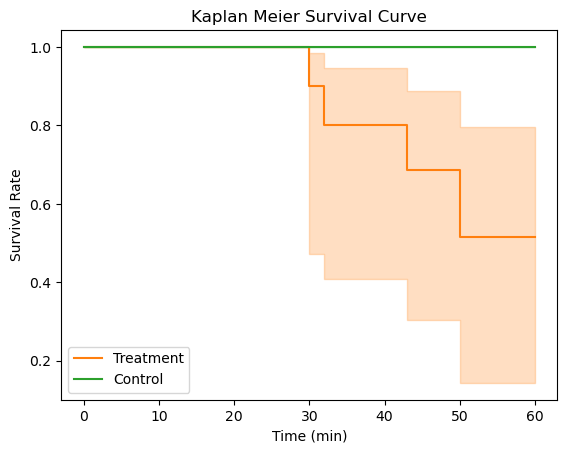

In [3]:
tasks = 1
time_col = 'Time'
event_col = 'Success'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data[data['Group'] == 1][data['Task'] == i]
	group2_data = data[data['Group'] == 2][data['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate')
	print(logrank_test(group1_data['Time'], group2_data['Time'], event_observed_A=group1_data['Success'], event_observed_B=group2_data['Success']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


In [4]:
data

,Group,Task,Time_first,Time,Success,folder,file,class,method,line,...,right method,right lines,correct,sound solution,Control YOE,Control Contribs,Alt YOE,Alt Contrib,group,issue_number
0,2,1,19,43,0,18.0,18.0,19.0,21.0,21.0,...,0,0,0,0,4.0,0.0,NaN,NaN,Control,5679
1,1,1,50,50,1,44.0,45.0,45.0,46.0,47.0,...,1,1,1,1,NaN,NaN,7.0,0.0,Treatment,5485
2,2,1,0,58,0,56.0,56.0,58.0,NaN,NaN,...,0,0,0,0,3.0,0.0,NaN,NaN,Treatment,4612
3,2,1,0,56,0,38.0,38.0,38.0,41.0,41.0,...,0,0,0,0,1.0,1.0,NaN,NaN,Control,4612
4,1,1,0,38,0,31.0,31.0,31.0,32.0,33.0,...,0,0,0,1,NaN,NaN,4.0,2.0,Treatment,5069
5,2,1,0,19,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1.0,1.0,NaN,NaN,Control,5485
6,1,1,0,46,0,35.0,35.0,35.0,37.0,37.0,...,0,0,0,1,NaN,NaN,2.0,0.0,Treatment,5485
7,1,1,43,43,1,43.0,43.0,43.0,43.0,43.0,...,1,1,1,1,NaN,NaN,5.0,1.0,Treatment,5485
8,2,1,0,57,0,25.0,25.0,37.0,46.0,57.0,...,0,0,0,1,2.0,2.0,NaN,NaN,Control,5069
9,2,1,0,31,0,31.0,31.0,31.0,31.0,NaN,...,0,0,0,0,5.0,0.0,NaN,NaN,Control,4612


In [5]:
data_60 = data.copy()


# Replace NaNs with the mean of the column where it is located
# the mean calculated above is 110, so NaN values will be replaced with 110
#data_60['issue'] = data['issue'].fillna(60)
#data_60['problem'] = data['problem'].fillna(60)
data_60['folder'] = data['folder'].fillna(60)
data_60['file'] = data['file'].fillna(60)
data_60['class'] = data['class'].fillna(60)
data_60['method'] = data['method'].fillna(60)
data_60['line'] = data['line'].fillna(60)
data_60['solution'] = data['solution'].fillna(60)
data_60['implement'] = data['implement'].fillna(60)
#data_60['end'] = data['end'].fillna(60)

data_60.to_csv('./data/Milestones_survival_asap_All_60.csv')
data_60

,Group,Task,Time_first,Time,Success,folder,file,class,method,line,...,right method,right lines,correct,sound solution,Control YOE,Control Contribs,Alt YOE,Alt Contrib,group,issue_number
0,2,1,19,43,0,18.0,18.0,19.0,21.0,21.0,...,0,0,0,0,4.0,0.0,NaN,NaN,Control,5679
1,1,1,50,50,1,44.0,45.0,45.0,46.0,47.0,...,1,1,1,1,NaN,NaN,7.0,0.0,Treatment,5485
2,2,1,0,58,0,56.0,56.0,58.0,60.0,60.0,...,0,0,0,0,3.0,0.0,NaN,NaN,Treatment,4612
3,2,1,0,56,0,38.0,38.0,38.0,41.0,41.0,...,0,0,0,0,1.0,1.0,NaN,NaN,Control,4612
4,1,1,0,38,0,31.0,31.0,31.0,32.0,33.0,...,0,0,0,1,NaN,NaN,4.0,2.0,Treatment,5069
5,2,1,0,19,0,60.0,60.0,60.0,60.0,60.0,...,0,0,0,0,1.0,1.0,NaN,NaN,Control,5485
6,1,1,0,46,0,35.0,35.0,35.0,37.0,37.0,...,0,0,0,1,NaN,NaN,2.0,0.0,Treatment,5485
7,1,1,43,43,1,43.0,43.0,43.0,43.0,43.0,...,1,1,1,1,NaN,NaN,5.0,1.0,Treatment,5485
8,2,1,0,57,0,25.0,25.0,37.0,46.0,57.0,...,0,0,0,1,2.0,2.0,NaN,NaN,Control,5069
9,2,1,0,31,0,31.0,31.0,31.0,31.0,60.0,...,0,0,0,0,5.0,0.0,NaN,NaN,Control,4612


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/1638038872.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/1638038872.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.92 0.05      4.39


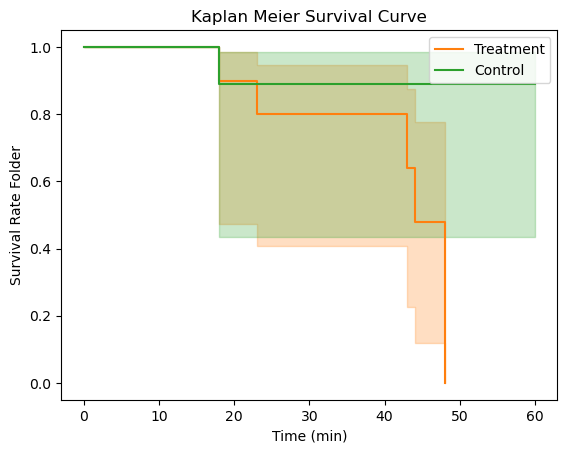

In [6]:
tasks = 1
time_col = 'folder'
event_col = 'right folder'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	##plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate Folder')
	print(logrank_test(group1_data['folder'], group2_data['folder'], event_observed_A=group1_data['right folder'], event_observed_B=group2_data['right folder']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.55 0.21      2.23


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/332084348.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/332084348.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


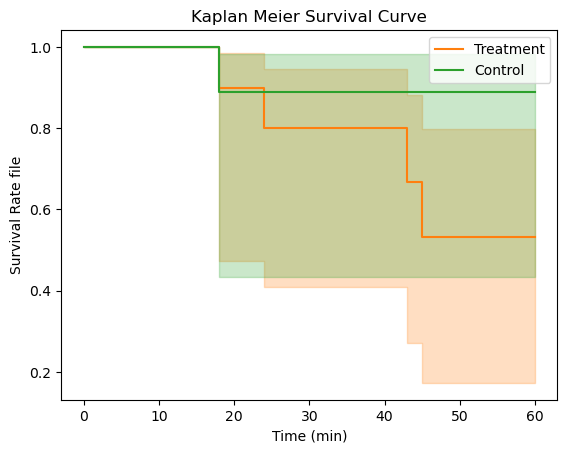

In [7]:
tasks = 1
time_col = 'file'
event_col = 'right file'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate file')
	print(logrank_test(group1_data['file'], group2_data['file'], event_observed_A=group1_data['right file'], event_observed_B=group2_data['right file']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/3509506183.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/3509506183.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.69 0.19      2.37


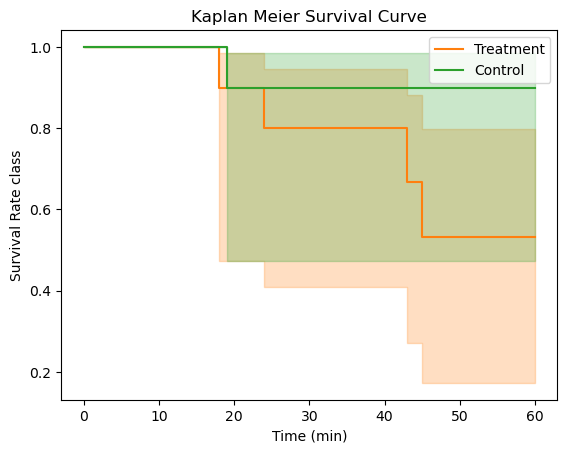

In [8]:
tasks = 1
time_col = 'class'
event_col = 'right class'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate class')
	print(logrank_test(group1_data['class'], group2_data['class'], event_observed_A=group1_data['right class'], event_observed_B=group2_data['right class']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/4277241858.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/4277241858.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.08 0.04      4.52


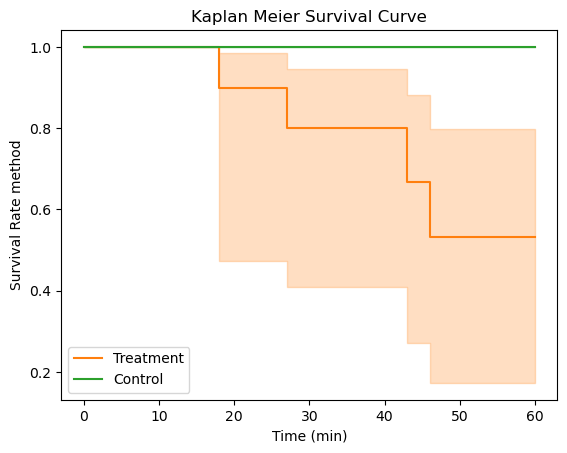

In [9]:
tasks = 1
time_col = 'method'
event_col = 'right method'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate method')
	print(logrank_test(group1_data['method'], group2_data['method'], event_observed_A=group1_data['right method'], event_observed_B=group2_data['right method']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.42 0.04      4.81


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/3319541955.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/3319541955.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


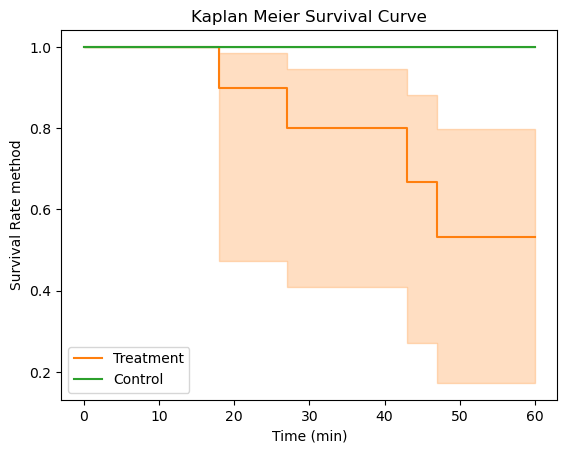

In [10]:
tasks = 1
time_col = 'line'
event_col = 'right lines'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate method')
	print(logrank_test(group1_data['line'], group2_data['line'], event_observed_A=group1_data['right lines'], event_observed_B=group2_data['right lines']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/2265707156.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/2265707156.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.77 <0.005      9.92


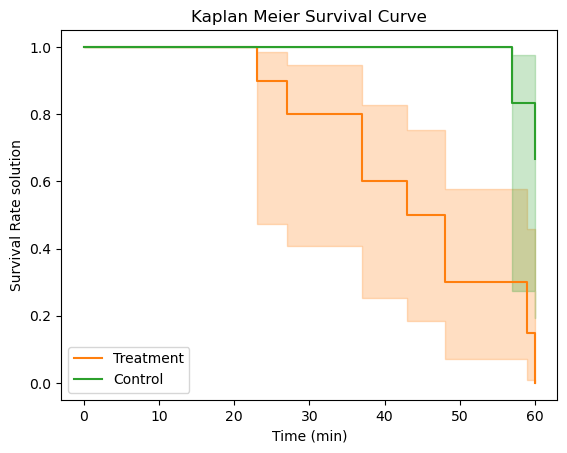

In [11]:
tasks = 1
time_col = 'solution'
event_col = 'sound solution'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate solution')
	print(logrank_test(group1_data['solution'], group2_data['solution'], event_observed_A=group1_data['sound solution'], event_observed_B=group2_data['sound solution']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.savefig('./figures/survival_solution.pdf', format='pdf')
plt.show()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.25 0.02      5.51


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/3086975294.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_26698/3086975294.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]


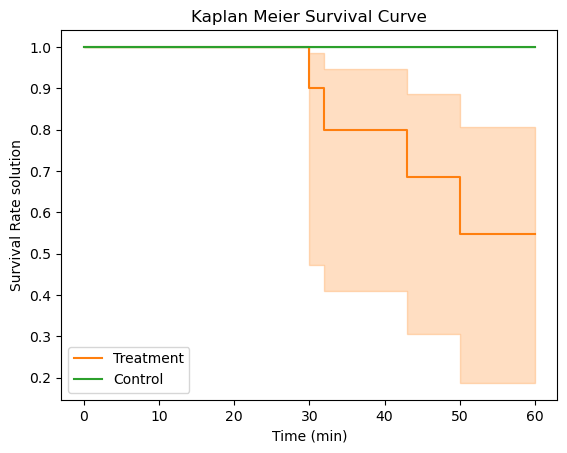

In [12]:
tasks = 1
time_col = 'implement'
event_col = 'correct'
covariates = ['Group']


plt.plot(1)
plt.title("Kaplan Meier Survival Curve")

for i in range(1,tasks+1):
	#plt.subplot(211)
	group1_data = data_60[data_60['Group'] == 1][data_60['Task'] == i]
	group2_data = data_60[data_60['Group'] == 2][data_60['Task'] == i]

	kmf1 = KaplanMeierFitter()
	kmf1.fit(group1_data[time_col], event_observed=group1_data[event_col])

	kmf2 = KaplanMeierFitter()
	kmf2.fit(group2_data[time_col], event_observed=group2_data[event_col])

	#plt.subplot(210 + i)
	ax = kmf1.plot(label='Treatment')
	kmf2.plot(ax=ax, label='Control')
	plt.xlabel('')
	plt.ylabel('Survival Rate solution')
	print(logrank_test(group1_data['implement'], group2_data['implement'], event_observed_A=group1_data['correct'], event_observed_B=group2_data['correct']))


#plt.subplot(210 + tasks)
plt.xlabel('Time (min)')
plt.show()
